<a href="https://colab.research.google.com/github/Fatima-Usf/Youtube_sentiment_analysis/blob/main/youtube_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb #to visualise data
from textblob import TextBlob

# Loading data

In [6]:
yt_comments = pd.read_csv("GBcomments.csv", error_bad_lines=False) #error_bad_lines to fix 'ParserError' because our data contain lines with too many fields

In [7]:
yt_comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0.0,0.0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1.0,0.0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0.0,0.0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0.0,0.0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0


# Data preprocessing

In [8]:
yt_comments.isna().sum() #checking missing values by getting the summation of all the missing values available

video_id        0
comment_text    7
likes           1
replies         1
dtype: int64

In [9]:
# Dropping the missing values
yt_comments.dropna(inplace=True) # inplace to keep the DF with valid entries in the same variable


# Applying TextBlob library to get the polarity

In [10]:
#Getting the polarity of comments
sentiment_polarity =[]
for i in yt_comments["comment_text"]:
  sentiment_polarity.append(TextBlob(i).sentiment.polarity)

In [11]:
# Adding the polarity list to my dataframe as a new column
yt_comments['Polarity']=sentiment_polarity

# Displaying the result ( DF with polarity )

In [12]:
#displaying the new dataframe
yt_comments.head(10)

,video_id,comment_text,likes,replies,Polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0.0,0.0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1.0,0.0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0.0,0.0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0.0,0.0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0.0,0.0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0.0,0.0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0.0,0.0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0.0,0.0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0.0,0.0,0.500000


Filtering positives /negatives comments

In [13]:
#Filtering positive opinions only
positives_comments = yt_comments[yt_comments['Polarity']==1]

In [14]:
positives_comments.shape # display how many lines & columns on positives data

(1648, 5)

In [15]:
positives_comments.head()

,video_id,comment_text,likes,replies,Polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0.0,0.0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0.0,2.0,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0.0,1.0,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0.0,0.0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0.0,0.0,1.0




---



# `Wordcloud presentation`

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
stopwords = set(STOPWORDS)

In [30]:
all_comments = ' '.join(positives_comments['comment_text']) # Join all items in a tuple into one string, using a space as separator:

In [25]:
wordcloud = WordCloud(width=1200, height= 800, stopwords=stopwords).generate(all_comments)

(-0.5, 1199.5, 799.5, -0.5)

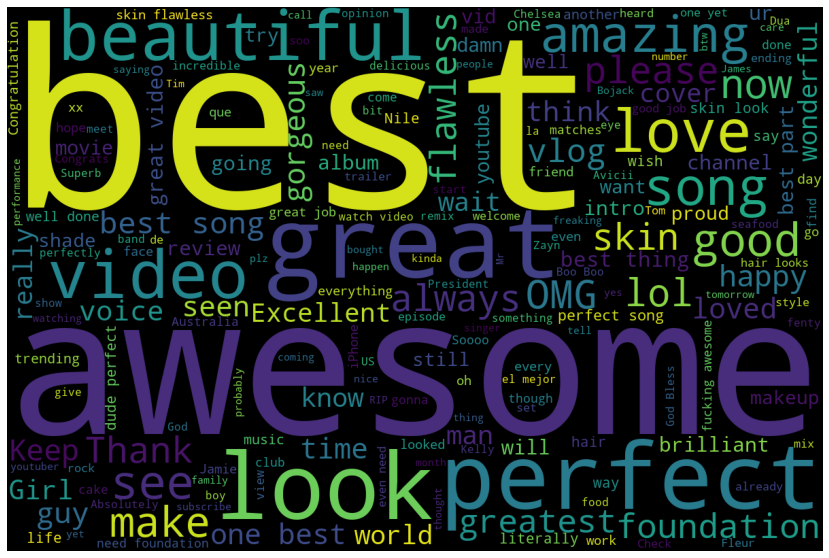

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')